# **Title of Project**

Wine Quality Prediction

## **Objective**

Wine Quality Prediction using data such as acidity , chlorides , residual sugar using Support Vector Machines

## **Data Source**

Input variables (based on physicochemical tests):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol <br><br>

Output variable (based on sensory data):
* quality (score between 0 and 10)

URL: https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv

## **Import Library**

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

## **Import Data**

In [5]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv',sep=';')

## **Describe Data**

In [6]:
df.shape

(4898, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [12]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [13]:
df.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


## **Data Visualization**

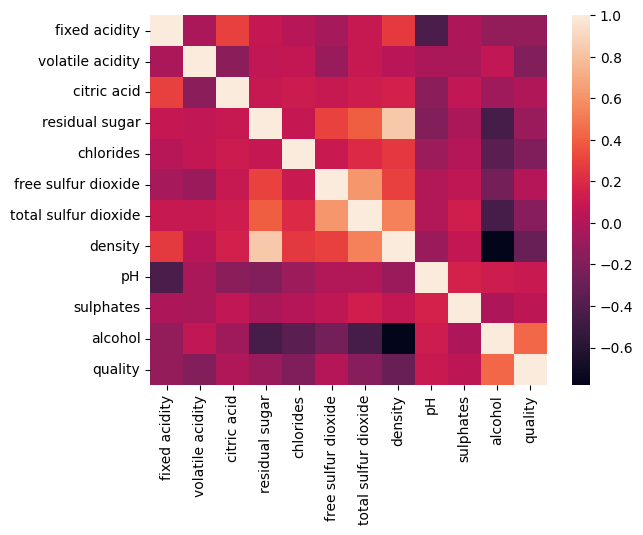

In [14]:
sns.heatmap(df.corr())
plt.show()

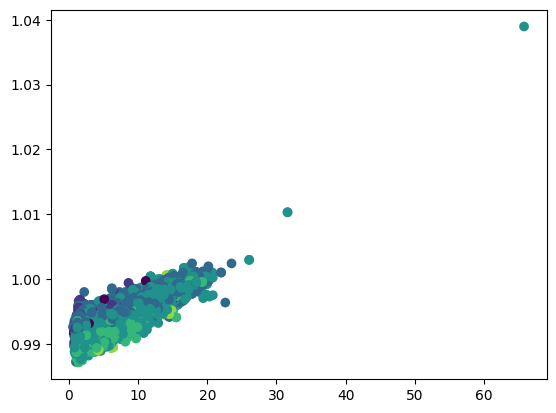

In [15]:
plt.scatter(df['residual sugar'],df['density'],c=df['quality'])
plt.show()

## **Define Target Variable (y) and Feature Variables (X)**

In [16]:
Y=df['quality']

In [17]:
X=df.drop(columns=['quality'])

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [19]:
Y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

## **Data Preprocessing**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [21]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

## **Train Test Split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=1234)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## **Modeling**

In [24]:
from sklearn.svm import SVC
model1 = SVC()


In [25]:
model1.fit(X_train,y_train)

SVC()

## **Prediction**

In [26]:
y_pred=model1.predict(X_test)

In [27]:
y_pred.shape

(1470,)

In [28]:
y_pred

array([6, 6, 6, ..., 5, 7, 5])

## **Model Evaluation**

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   6,   0,   0,   0],
       [  0,   1,  30,  14,   0,   0,   0],
       [  0,   0, 260, 155,   2,   0,   0],
       [  0,   0, 136, 513,  34,   0,   0],
       [  0,   0,   9, 175,  73,   0,   0],
       [  0,   0,   0,  39,  20,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0]])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.02      0.04        45
           5       0.60      0.62      0.61       417
           6       0.57      0.75      0.65       683
           7       0.57      0.28      0.38       257
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1470
   macro avg       0.39      0.24      0.24      1470
weighted avg       0.56      0.58      0.54      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model Rerun with only two classes**

In [32]:
Y=Y.apply(lambda x:1 if x>=6 else 0)
#If quality is 6 or above it is taken as 1(good) otherwise 0(bad)

In [33]:
Y.value_counts()

1    3258
0    1640
Name: quality, dtype: int64

## **Train Test Split**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=1234)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## **Modeling**

In [36]:
model2 = SVC()


In [37]:
model2.fit(X_train,y_train)

SVC()

## **Prediction**

In [38]:
y_pred2=model2.predict(X_test)

In [39]:
y_pred2.shape

(1470,)

In [40]:
y_pred2

array([1, 1, 1, ..., 0, 1, 0])

## **Model Evaluation**

In [41]:
confusion_matrix(y_test,y_pred2)

array([[286, 183],
       [130, 871]])

In [42]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       469
           1       0.83      0.87      0.85      1001

    accuracy                           0.79      1470
   macro avg       0.76      0.74      0.75      1470
weighted avg       0.78      0.79      0.78      1470



## **Explanation**

Using only two classes gives much better classification results and is useful for broad classication